In [1]:
"""
This script works on TensorFlow 1.x :)
"""
import sys
sys.path.append("..")
import tensorflow as tf
import input_data
import matplotlib.pyplot as plt
%pylab inline


print(tf.__version__)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

Populating the interactive namespace from numpy and matplotlib
1.12.0


In [2]:
def imshow(img):
    plt.imshow(np.reshape(img, [28, 28]))
    plt.show()

In [3]:
mnist = input_data.read_data_sets('../MNIST_data/', one_hot=True)

Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


(784,)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[7]


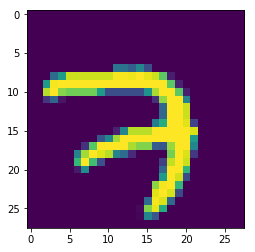

(784,)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[3]


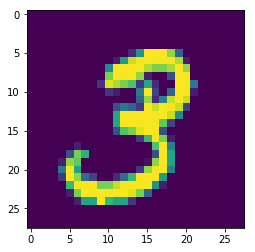

(784,)
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[4]


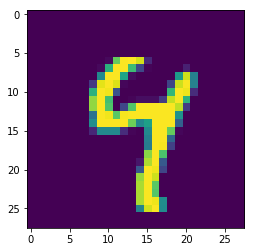

(784,)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[6]


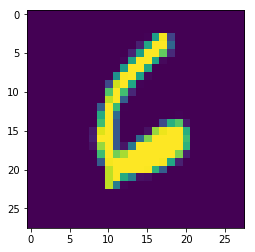

(784,)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1]


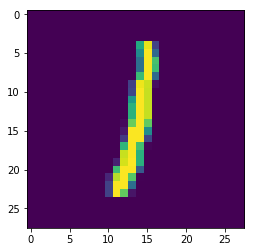

(784,)
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[8]


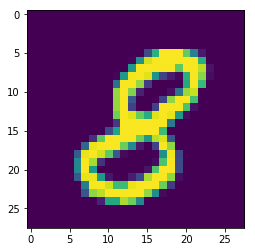

(784,)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1]


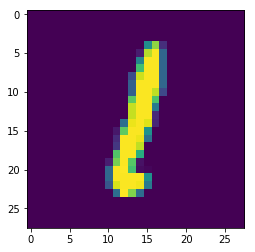

(784,)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]


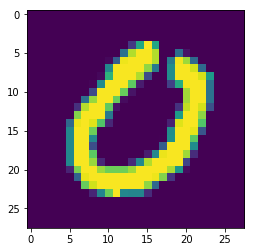

(784,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[9]


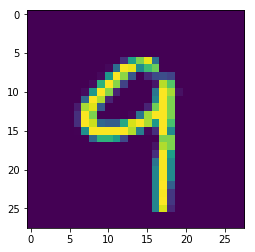

(784,)
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[8]


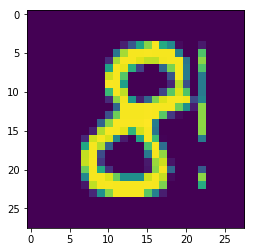

In [4]:
for index in range(10):
    print(mnist.train.images[index].shape)
    print(mnist.train.labels[index])
    print(np.nonzero(mnist.train.labels[index])[0])
    imshow(mnist.train.images[index])

In [5]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)


def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [6]:
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W_fc1 = weight_variable([784, 200])
b_fc1 = bias_variable([200])
W_fc2 = weight_variable([200, 200])
b_fc2 = bias_variable([200])
W_out = weight_variable([200, 10])
b_out = bias_variable([10])
hidden_1 = tf.nn.relu(tf.matmul(x, W_fc1) + b_fc1)
hidden_2 = tf.nn.relu(tf.matmul(hidden_1, W_fc2) + b_fc2)
y = tf.nn.softmax(tf.matmul(hidden_2, W_out) + b_out)

In [7]:
# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

In [8]:
# Train
training_iteration = 10000
batch_size = 100
display_step = 50
tf.summary.scalar('loss', cross_entropy)
tf.summary.scalar('accuracy', accuracy)
merged = tf.summary.merge_all()
with tf.Session() as sess:
    writer = tf.summary.FileWriter('./neural_network/', sess.graph)
    sess.run(tf.initialize_all_variables())
    for iteration in range(training_iteration):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        summary, _, current_accuracy = sess.run([merged, train_step, accuracy], feed_dict={x: batch_xs, y_: batch_ys})
        writer.add_summary(summary, iteration)
        if iteration % display_step == 0:
            print('Iteration: %5d | Accuracy = %.6f' % (iteration + 1, current_accuracy))
    print('Test accuracy: %.6f' % sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
    writer.close()
    

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Iteration:     1 | Accuracy = 0.120000
Iteration:    51 | Accuracy = 0.830000
Iteration:   101 | Accuracy = 0.830000
Iteration:   151 | Accuracy = 0.880000
Iteration:   201 | Accuracy = 0.900000
Iteration:   251 | Accuracy = 0.850000
Iteration:   301 | Accuracy = 0.880000
Iteration:   351 | Accuracy = 0.940000
Iteration:   401 | Accuracy = 0.900000
Iteration:   451 | Accuracy = 0.940000
Iteration:   501 | Accuracy = 0.920000
Iteration:   551 | Accuracy = 0.930000
Iteration:   601 | Accuracy = 0.960000
Iteration:   651 | Accuracy = 0.900000
Iteration:   701 | Accuracy = 0.920000
Iteration:   751 | Accuracy = 0.970000
Iteration:   801 | Accuracy = 0.930000
Iteration:   851 | Accuracy = 0.920000
Iteration:   901 | Accuracy = 0.930000
Iteration:   951 | Accuracy = 0.930000
Iteration:  1001 | Accuracy = 0.970000
Iteration:  1051 | Accuracy = 0.890000
Iteration:  1101 | Accuracy = 0.930000
Iteration:  1151 | Accuracy =